In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("final_preprocessed_dataset.csv")

In [3]:
df

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,holiday,type,size
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,24924.50,0,0,151315
1,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,3,14612.19,0,1,103681
2,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,4,26323.15,0,1,103681
3,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,5,36414.63,0,1,103681
4,35,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,6,11437.81,0,1,103681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412717,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,49,7770.71,0,0,219622
412718,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,50,1486.00,0,0,219622
412719,13,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,52,4738.93,0,0,219622
412720,41,2012-10-26,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,4,32699.78,0,0,196321


In [4]:
df.columns

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment', 'dept',
       'weekly_sales', 'holiday', 'type', 'size'],
      dtype='object')

In [5]:
# Converting the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Extracting year, month, and week from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week


In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values


store           0
date            0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
dept            0
weekly_sales    0
holiday         0
type            0
size            0
year            0
month           0
week            0
dtype: int64

In [8]:
features = df.drop(columns=['weekly_sales','date'])

# Target variable
target = df['weekly_sales']

In [9]:
features

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,holiday,type,size,year,month,week
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,0,0,151315,2010,2,5
1,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,3,0,1,103681,2010,2,5
2,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,4,0,1,103681,2010,2,5
3,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,5,0,1,103681,2010,2,5
4,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,6,0,1,103681,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412717,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,49,0,0,219622,2012,10,43
412718,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,50,0,0,219622,2012,10,43
412719,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,52,0,0,219622,2012,10,43
412720,41,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,4,0,0,196321,2012,10,43


In [10]:
target

0         24924.50
1         14612.19
2         26323.15
3         36414.63
4         11437.81
            ...   
412717     7770.71
412718     1486.00
412719     4738.93
412720    32699.78
412721     1076.80
Name: weekly_sales, Length: 412722, dtype: float64

In [92]:
print(df['size'].nunique)

<bound method IndexOpsMixin.nunique of 0         151315
1         103681
2         103681
3         103681
4         103681
           ...  
412717    219622
412718    219622
412719    219622
412720    196321
412721    118221
Name: size, Length: 412722, dtype: int64>


In [11]:
from sklearn.model_selection import train_test_split

##Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=500, learning_rate = 0.05, random_state=42)
model.fit(X_train, y_train)
gb_pred_1 = model.predict(X_test)
gb_mse_1 = mean_squared_error(y_test, gb_pred_1)
gb_r2_1 = r2_score(y_test, gb_pred_1)

print("R^2 VALUE: ", gb_r2_1)

R^2 VALUE:  0.8074877711302341


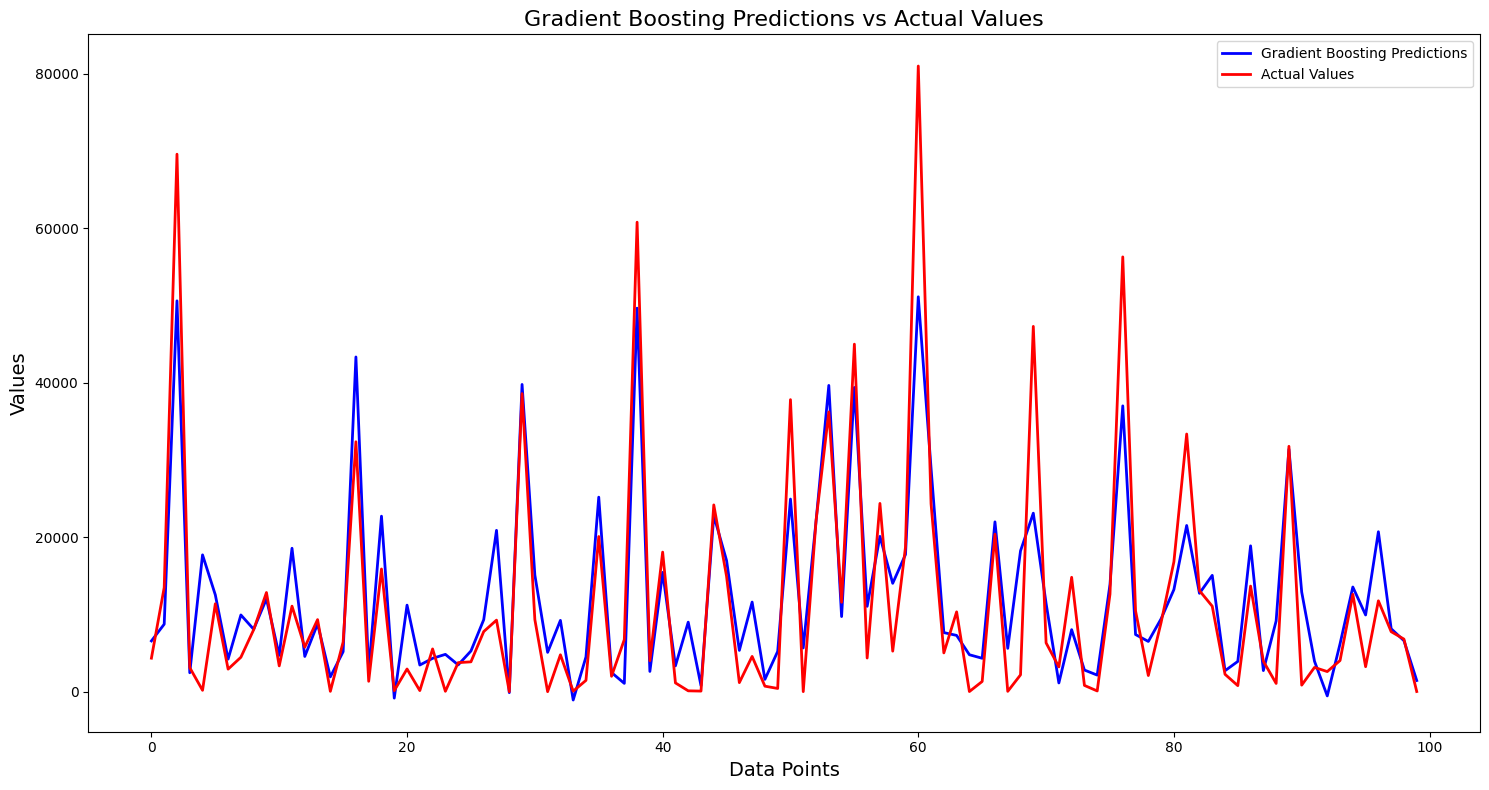

In [14]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create a single plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot Gradient Boosting Predictions
ax.plot(gb_pred_1[:n], label="Gradient Boosting Predictions", linewidth=2.0, color='blue')

# Plot Actual Values
ax.plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')

# Set title and labels
ax.set_title('Gradient Boosting Predictions vs Actual Values', fontsize=16)
ax.set_xlabel('Data Points', fontsize=14)
ax.set_ylabel('Values', fontsize=14)

# Add a legend
ax.legend(loc="best")

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
feature_importance = model.feature_importances_

In [16]:
# Display feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)


Feature Importance:
         Feature  Importance
10          dept    0.750611
13          size    0.186741
0          store    0.036538
12          type    0.010517
8            cpi    0.008681
16          week    0.003718
9   unemployment    0.001099
1    temperature    0.000930
5      markdown3    0.000427
11       holiday    0.000336
15         month    0.000172
2     fuel_price    0.000127
6      markdown4    0.000071
4      markdown2    0.000018
14          year    0.000009
3      markdown1    0.000005
7      markdown5    0.000000


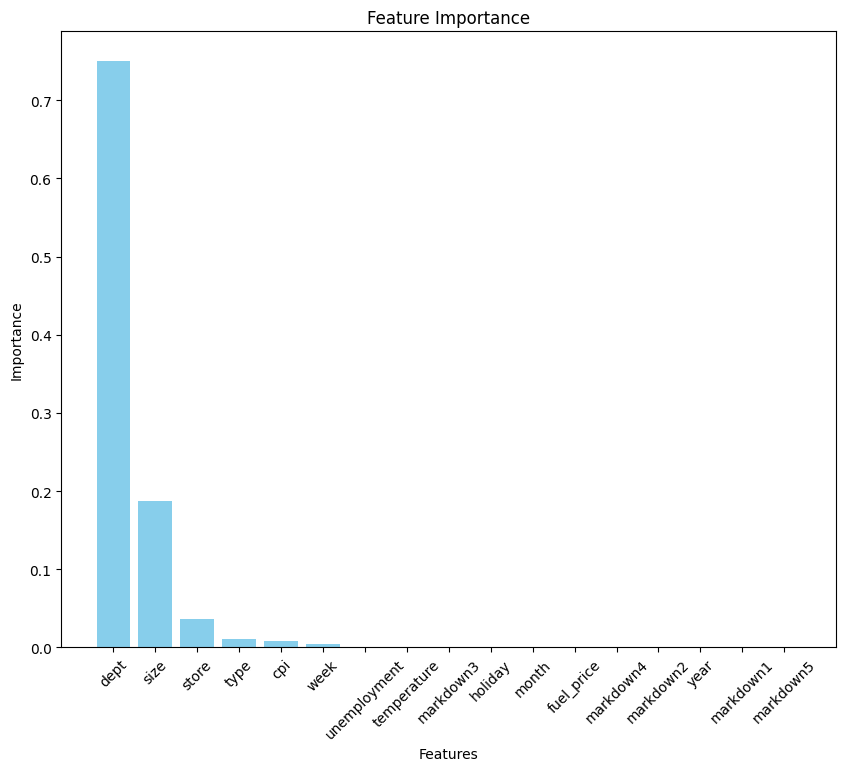

In [17]:
plt.figure(figsize=(10, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

## after feature engineering

In [83]:
# Example of removing low-importance features
X_train_fxt = X_train.drop(['month', 'temperature', 'fuel_price', 'markdown1', 'markdown2','markdown3', 'holiday','unemployment', 'markdown4', 'markdown5', 'year'], axis=1)
X_test_fxt = X_test.drop(['month', 'temperature', 'fuel_price', 'markdown1', 'markdown2','markdown3', 'holiday','unemployment', 'markdown4', 'markdown5', 'year'], axis=1)

In [93]:

model_FE= GradientBoostingRegressor(n_estimators=500, learning_rate = 0.05, random_state=42)
model_FE.fit(X_train_fxt, y_train)
gb_pred_FE = model_FE.predict(X_test_fxt)
gb_mse_FE = mean_squared_error(y_test, gb_pred_FE)
gb_r2_FE = r2_score(y_test, gb_pred_FE)

print("R^2 VALUE: ", gb_r2_3)

R^2 VALUE:  0.8121502040247139


In [98]:
X_train_fxt.columns

Index(['store', 'cpi', 'dept', 'type', 'size', 'week'], dtype='object')

## Hyper parameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300,500],
    'learning_rate': [0.01, 0.05],
   
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 500}


# save the model in the joblib

In [94]:
import joblib

In [95]:
model_filename = "walmart_model.joblib"
joblib.dump(model_FE, model_filename)
print(f"Model saved to {model_filename}")

Model saved to walmart_model.joblib


In [114]:
import datetime
import numpy as np

def get_week_number(year, month, week_of_month):
    """
    Calculate the week number for a given year, month, and week of the month.
    
    Args:
        year (int): The target year (e.g., 2024).
        month (int): The month of the year (1 for January, 12 for December).
        week_of_month (int): The week number within the month (1st week, 2nd week, etc.).
    
    Returns:
        int: The ISO week number for the given year, month, and week_of_month.
    """
    # Calculate the date for the first day of the target week
    first_day_of_month = datetime.datetime(year, month, 1)
    target_date = first_day_of_month + datetime.timedelta(weeks=week_of_month - 1)
    
    # Get the ISO week number for the target date
    week_number = target_date.isocalendar()[1]
    print(week_number)
    return week_number

# Load the saved model
loaded_model = joblib.load('walmart_model.joblib')

# Dynamic input for year, month, and week of the month
year = 2024  # Example: Change this dynamically if needed
month = 1    # January
week_of_month =2  # 3rd week of January

# Calculate the week number dynamically
week_number = get_week_number(year, month, week_of_month)
print(f"Week number for year {year}, month {month}, week {week_of_month}: {week_number}")

# Replace these values with actual inputs
# Example input: store=10, cpi=211.3 (estimated CPI), dept=5, type=1, size=2000
sample_input = np.array([[20, 211.3, 92, 1, 600000, week_number]])

# Predict the sales using the sample input
predicted_sales = loaded_model.predict(sample_input)

print(f"Predicted Sales for {year}, week {week_of_month} of month {month}: {predicted_sales[0]}")


2
Week number for year 2024, month 1, week 2: 2
Predicted Sales for 2024, week 2 of month 1: 61889.66251947942


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Normalization

In [20]:
for col in df.columns:
    print(col, df[col].dtype)


store int64
date datetime64[ns]
temperature float64
fuel_price float64
markdown1 float64
markdown2 float64
markdown3 float64
markdown4 float64
markdown5 float64
cpi float64
unemployment float64
dept int64
weekly_sales float64
holiday int64
type int64
size int64
year int32
month int32
week UInt32


In [21]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.timestamp())


In [22]:
import pandas as pd

# Normalize each column to [0, 1] range
normalized_df = (df - df.min()) / (df.max() - df.min())

print("Original Data:")
print(df)

print("\nNormalized Data:")
print(normalized_df)


Original Data:
        store          date  temperature  fuel_price  markdown1  markdown2  \
0           1  1.265328e+09        42.31       2.572       0.00       0.00   
1          35  1.265328e+09        27.19       2.784       0.00       0.00   
2          35  1.265328e+09        27.19       2.784       0.00       0.00   
3          35  1.265328e+09        27.19       2.784       0.00       0.00   
4          35  1.265328e+09        27.19       2.784       0.00       0.00   
...       ...           ...          ...         ...        ...        ...   
412717     13  1.351210e+09        46.97       3.755   10192.49     364.57   
412718     13  1.351210e+09        46.97       3.755   10192.49     364.57   
412719     13  1.351210e+09        46.97       3.755   10192.49     364.57   
412720     41  1.351210e+09        41.80       3.686    4864.30     101.34   
412721     45  1.351210e+09        58.85       3.882    4018.91      58.08   

        markdown3  markdown4  markdown5         

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=500, learning_rate = 0.05, random_state=42)
model.fit(X_train, y_train)
gb_pred_1 = model.predict(X_test)
gb_mse_1 = mean_squared_error(y_test, gb_pred_1)
gb_r2_1 = r2_score(y_test, gb_pred_1)

print("R^2 VALUE: ", gb_r2_1)

## Grouping week into months

In [56]:
monthly_sales = normalized_df.groupby(['month', 'store', 'dept'])['weekly_sales'].sum().reset_index()

In [57]:
X = normalized_df.drop(columns=['weekly_sales','date'])

# Target variable
Y = normalized_df['weekly_sales']

In [58]:
# Split data into training and testing sets
date_col = normalized_df['date']
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate = 0.05, random_state=42)
gb_model.fit(x_train, Y_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [60]:
# Make predictions
Y_pred = gb_model.predict(x_test)

gb_r2_3 = r2_score(Y_test, Y_pred)

print("R^2 VALUE: ", gb_r2_3)

R^2 VALUE:  0.8074877711302343


In [61]:
# Ensure 'month' is a column in both monthly_sales and x_test
monthly_sales = monthly_sales.reset_index()

In [62]:
print(monthly_sales.head())
print(monthly_sales.columns)


   index  month  store      dept  weekly_sales
0      0    0.0    0.0  0.000000      2.011897
1      1    0.0    0.0  0.010204      4.257643
2      2    0.0    0.0  0.020408      1.611367
3      3    0.0    0.0  0.030612      3.634015
4      4    0.0    0.0  0.040816      2.285877
Index(['index', 'month', 'store', 'dept', 'weekly_sales'], dtype='object')


In [63]:
print(x_test.index)
print(monthly_sales.index)


Index([197753, 162761,  78396, 170838, 271922, 238907,  64192, 145886, 113631,
       267577,
       ...
       341388, 309064,   8570, 249278, 201701,  57272, 293876, 159068, 313501,
       275533],
      dtype='int64', length=82545)
RangeIndex(start=0, stop=37470, step=1)


In [64]:
print(date_col)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
412717    1.0
412718    1.0
412719    1.0
412720    1.0
412721    1.0
Name: date, Length: 412722, dtype: float64


In [65]:
# Assuming you have the original min and max values
date_min = pd.Timestamp('2010-02-05')  # Example minimum date
date_max = pd.Timestamp('2012-10-26')  # Example maximum date

# Convert to numeric timestamps
date_min_numeric = date_min.timestamp()
date_max_numeric = date_max.timestamp()

# Reverse normalization
x_test['original_date_numeric'] = (
    date_col * (date_max_numeric - date_min_numeric)
) + date_min_numeric


In [68]:
x_test['original_date_numeric']

197753    1.306454e+09
162761    1.299197e+09
78396     1.281658e+09
170838    1.301011e+09
271922    1.322179e+09
              ...     
57272     1.276819e+09
293876    1.327018e+09
159068    1.298592e+09
313501    1.330646e+09
275533    1.322784e+09
Name: original_date_numeric, Length: 82545, dtype: float64

In [71]:
# Convert 'original_date_numeric' to datetime format
x_test['original_date'] = pd.to_datetime(x_test['original_date_numeric'], unit='s')

# Merge the 'month' column into x_test based on matching indices
x_test['year_month'] = x_test['original_date'].dt.to_period('M')  # Use 'M' to get year-month format


# Group by 'year_month'
Y_test_monthly = Y_test.groupby(x_test['year_month']).sum()
Y_pred_monthly = pd.Series(Y_pred, index=x_test['year_month']).groupby('year_month').sum()


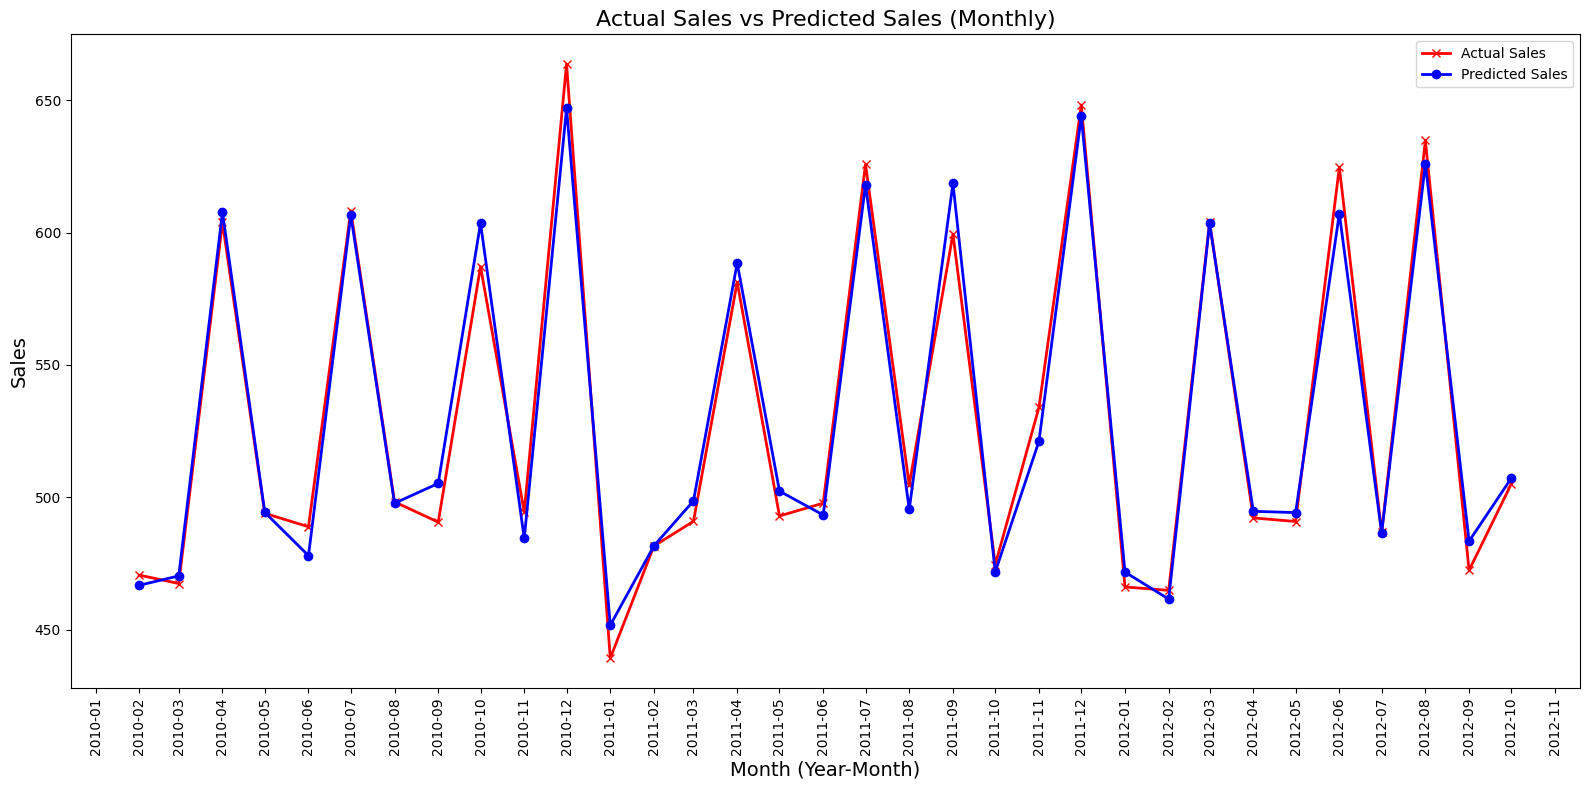

In [81]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 8))

# Plot actual sales
ax.plot(Y_test_monthly.index.to_timestamp(), Y_test_monthly.values, label="Actual Sales",marker='x', linewidth=2.0, color='red')

# Plot predicted sales
ax.plot(Y_pred_monthly.index.to_timestamp(), Y_pred_monthly.values, label="Predicted Sales",marker = 'o', linewidth=2.0, color='blue')

# Set title and labels
ax.set_title('Actual Sales vs Predicted Sales (Monthly)', fontsize=16)
ax.set_xlabel('Month (Year-Month)', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick every month
plt.xticks(rotation=90)  # Rotate labels for better visibility

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
